In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ks_etdrk4 import kursiv_predict

In [3]:
timestep = 0.25
prediction_steps = 100000
system_size = 22
grid_points = 64

In [4]:
u0 = np.random.uniform(low=-0.6, high=0.6, size=grid_points)
u0 = u0 - np.mean(u0)

In [5]:
u_arr, params = kursiv_predict(u0, tau=timestep, N=grid_points, d=system_size, T=prediction_steps, 
                               params = np.array([[],[]], dtype = np.complex128),
                               int_steps = 1, noise = np.zeros((1,1), dtype = np.double))  # what is params??
u_arr = np.ascontiguousarray(u_arr) / (1.1876770355823614)  # I took the number from the class Numerical Model,
                                                            # but not really sure where it came from

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
t_lyap = 20.83  # Wikner et al. 2022 (arxiv version), p. 20
t = np.arange(0, timestep*prediction_steps, timestep) / t_lyap

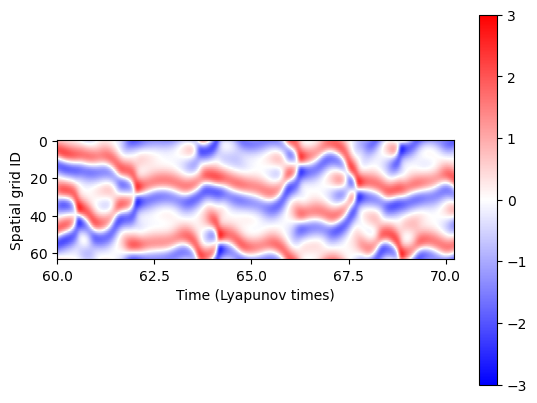

In [7]:
start = 5000
num = 850


fig, ax = plt.subplots()

cax = ax.imshow(u_arr[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)


pixels_per_tick = 208
tick_positions = np.arange(0, len(t[start:start+num]), pixels_per_tick)
ax.set_xticks(tick_positions)
ax.set_xticklabels(np.around(t[start:start+num][tick_positions], decimals=1))

ax.set_xlabel('Time (Lyapunov times)')
ax.set_ylabel('Spatial grid ID')

fig.colorbar(cax, ax=ax)

ax.set_aspect(4)

In [9]:
u_arr.shape

(64, 100001)

In [10]:
u_arr_for_saving = np.expand_dims(u_arr.T, axis=-1)  # T x Q x d (with d=1)
u_arr_for_saving.shape

(100001, 64, 1)